Epoch 1/5
938/938 [==============================] - 9s 9ms/step - loss: 0.1659 - accuracy: 0.9506 - val_loss: 0.0524 - val_accuracy: 0.9828
Epoch 2/5
938/938 [==============================] - 9s 9ms/step - loss: 0.0494 - accuracy: 0.9854 - val_loss: 0.0412 - val_accuracy: 0.9859
Epoch 3/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0349 - accuracy: 0.9892 - val_loss: 0.0321 - val_accuracy: 0.9894
Epoch 4/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0253 - accuracy: 0.9920 - val_loss: 0.0280 - val_accuracy: 0.9906
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0269 - accuracy: 0.9913
Test Accuracy: 0.9912999868392944
313/313 [==============================] - 1s 2ms/step


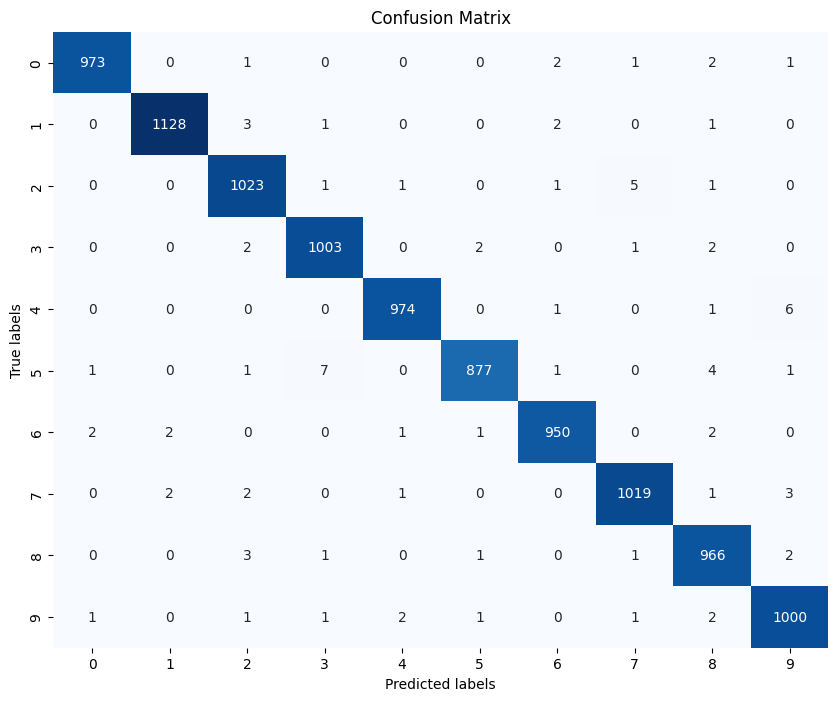

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Data Preprocessing
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Predict on the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
